In [131]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import csv
import requests
import glob 
import os

In [5]:
from tqdm import tqdm

In [9]:
URL = "https://www.federalregister.gov/developers/api/v1"

r = requests.get(URL)
print(r, r.status_code, r.ok)

print(r.content[:100])

<Response [200]> 200 True
b'<!DOCTYPE html><html><head><base href="/developers/api/"><title>Federal Register API API Documentati'


In [110]:
url = 'https://www.federalregister.gov/api/v1/documents.json'

term = '"data analytics"'
per_page = 100

# Define the payload fields
payload = {'conditions[term]': term, 'per_page': per_page,}
r = requests.get(url,params=payload)

# Count the number of documents
n_documents = r.json()['count']
n_pages = r.json()['total_pages']

data = []

for n in tqdm(range(n_pages)):
    payload = {
        'per_page':per_page,
        'order':'newest',
        'conditions[term]': term,
        'fields[]': ['action', 'subtype', 'significant', 'document_number', 'publication_date', 'abstract', 'agency_names', 'agencies', 'title', 'topics', 'type', 'effective_on'],
        'page':n+1,
    }
        
    r = requests.get(url,params=payload)
    
    res = r.json()['results']
    data.extend(res)
    
    #print(res[0])    
    #print([x['title'][:50] for x in res[:5]])


100%|██████████| 2/2 [00:06<00:00,  3.40s/it]

In [111]:
df = pd.DataFrame(data).set_index('document_number')
df.to_csv('fed_reg_DA.csv')
print(len(df))
df

148


,abstract,action,agencies,agency_names,effective_on,publication_date,significant,subtype,title,topics,type
document_number,,,,,,,,,,,
2019-24138,This final rule with comment period revises th...,Final rule with comment period.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Centers...",2020-01-01,2019-11-12,False,None,Medicare Program: Changes to Hospital Outpatie...,"[Administrative practice and procedure, Biolog...",Rule
2019-24483,None,None,"[{'raw_name': 'DEPARTMENT OF JUSTICE', 'name':...","[Justice Department, Antitrust Division]",None,2019-11-12,None,None,Notice Pursuant to the National Cooperative Re...,[],Notice
2019-23856,"The NCUA's draft, ``detailed business-type bud...",Notice.,[{'raw_name': 'NATIONAL CREDIT UNION ADMINISTR...,[National Credit Union Administration],None,2019-11-01,None,None,The NCUA Staff Draft 2020-2021 Budget Justific...,[],Notice
2019-22027,This proposed rule is being issued by the Offi...,Proposed rule.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,[Health and Human Services Department],None,2019-10-17,False,None,Medicare and State Healthcare Programs: Fraud ...,"[Administrative practice and procedure, Fraud,...",Proposed Rule
2019-21254,Under the provisions of the Paperwork Reductio...,Notice of request for comments regarding an ex...,[{'raw_name': 'GENERAL SERVICES ADMINISTRATION...,[General Services Administration],None,2019-09-30,None,None,General Services Administration Acquisition Re...,[],Notice
2019-20118,None,None,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Nationa...",None,2019-09-18,None,None,Center for Scientific Review; Notice of Closed...,[],Notice
2019-20033,This notice sets forth the names and titles of...,Notice.,[{'raw_name': 'Council of the Inspectors Gener...,[Council of the Inspectors General on Integrit...,None,2019-09-17,None,None,Senior Executive Service Performance Review Bo...,[],Notice
2019-17615,"In accordance with the Privacy Act of 1974, as...",Notice of a modified system of records.,"[{'raw_name': 'DEPARTMENT OF EDUCATION', 'name...",[Education Department],None,2019-08-16,None,None,Privacy Act of 1974; System of Records,[],Notice
2019-16762,We are revising the Medicare hospital inpatien...,Final rule.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"[Health and Human Services Department, Centers...",2019-10-01,2019-08-16,False,None,Medicare Program; Hospital Inpatient Prospecti...,"[Administrative practice and procedure, Health...",Rule


In [91]:
print(f"Fraction with abstracts", 1 - df.abstract.isnull().mean())
ab = df.abstract.copy().dropna()
ab.str.len()

Fraction with abstracts 0.9019650183545671


document_number
2019-22705     913
2019-24138    1277
2019-24478     224
2019-23697     397
2019-23856     386
2019-23638     647
2019-21260    1244
2019-23468     189
2019-22684     251
2019-23061     163
2019-22920     337
2019-22537     719
2019-22896     404
2019-22763     274
2019-22653     490
2019-22156    1183
2019-20232     306
2019-21943    1022
2019-21852     541
2019-21368     265
2019-21822     282
2019-21412    3020
2019-21304     351
2019-21301     435
2019-21468    1598
2019-20045     301
2019-20099     362
2019-20100     568
2019-20329     535
2019-20229     912
              ... 
94-7684       1225
94-7777       1104
94-7569        205
94-7544        767
94-7234       1373
94-7187        871
94-6869       1094
94-6939        404
94-5975        797
94-5760        164
94-5313        785
94-4875       1081
94-4247       1300
94-4510       2262
94-4332        701
X94-10217     1138
94-3569        440
94-2027        451
94-3190        159
94-3216        374
94-2884        

In [87]:
ab.str.len().describe()

count     328.000000
mean      952.774390
std       690.702584
min       131.000000
25%       513.750000
50%       808.000000
75%      1176.250000
max      5792.000000
Name: abstract, dtype: float64

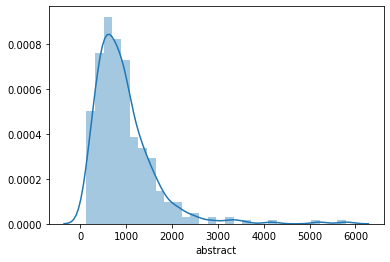

In [88]:
sns.distplot(ab.str.len())

In [135]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_AI.csv')
csv_input['Search Term'] = 'Artificial Intelligence'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_AI.csv', index=False)

In [139]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BD.csv')
csv_input['Search Term'] = 'Big Data'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BD.csv', index=False)

In [140]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BI.csv')
csv_input['Search Term'] = 'Business Intelligence'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_BI.csv', index=False)

In [141]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DA.csv')
csv_input['Search Term'] = 'Data Analytics'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DA.csv', index=False)

In [142]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_data_mine.csv')
csv_input['Search Term'] = 'Data Mining'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_data_mine.csv', index=False)

In [143]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DS.csv')
csv_input['Search Term'] = 'Data Science'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_DS.csv', index=False)

In [144]:
csv_input = pd.read_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_ML.csv')
csv_input['Search Term'] = 'Machine Learning'
csv_input.to_csv(r'C:\Users\joeln\Google Drive\GitHub\DATA-601\fed_reg_ML.csv', index=False)

In [149]:
path = r'C:\Users\joeln\Google Drive\GitHub\DATA-601'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
master_df   = pd.concat(df_from_each_file, ignore_index=True)

In [151]:
master_df.describe()

,document_number,abstract,action,agencies,agency_names,effective_on,publication_date,significant,subtype,title,topics,type,Search Term
count,758,579,572,758,758,128,758,131,13,758,758,758,758
unique,638,461,184,118,113,103,539,2,3,489,82,5,7
top,2016-14175,The National Technical Information Service (NT...,Notice.,[{'raw_name': 'DEPARTMENT OF HEALTH AND HUMAN ...,"['Health and Human Services Department', 'Nati...",2016-06-23,2019-11-12,False,Executive Order,Center for Scientific Review; Notice of Closed...,[],Notice,Data Analytics
freq,5,5,108,68,69,4,6,84,7,32,632,585,148


[Text(0, 0, 'Artificial Intelligence'),
 Text(0, 0, 'Big Data'),
 Text(0, 0, 'Business Intelligence'),
 Text(0, 0, 'Data Analytics'),
 Text(0, 0, 'Data Mining'),
 Text(0, 0, 'Data Science'),
 Text(0, 0, 'Machine Learning')]

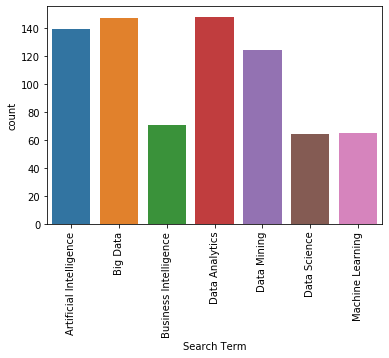

In [174]:
#count plot of all search terms (not unique documents)
cplt = sns.countplot(x="Search Term", data=master_df)

cplt.set_xticklabels(cplt.get_xticklabels(), rotation=90)

In [175]:
time chart = sns.FacetGrid(master_df, col="Search Term", row="publication_date")

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002ACAE2EAE18> (for post_execute):


ValueError: Image size of 1512x116424 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1512x116424 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1512x116424 with 3016 Axes>

In [188]:
master_df.dtypes

document_number             object
abstract                    object
action                      object
agencies                    object
agency_names                object
effective_on        datetime64[ns]
publication_date    datetime64[ns]
significant                 object
subtype                     object
title                       object
topics                      object
type                        object
Search Term                 object
dtype: object

In [184]:
master_df['publication_date'] =  pd.to_datetime(df['publication_date'])

In [187]:
master_df['effective_on'] =  pd.to_datetime(df['effective_on'])

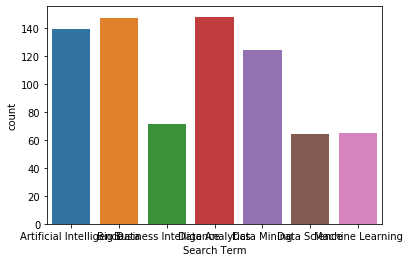

In [191]:
sns.countplot(x='Search Term', data= master_df)

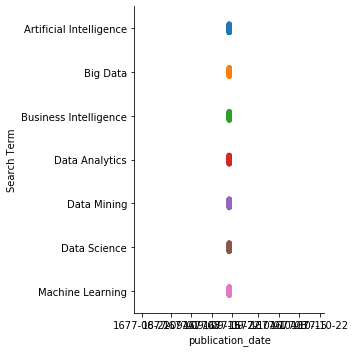

In [195]:
sns.catplot(x="publication_date", y="Search Term", data=master_df)